<font color=#cccccc>Credit Card customers (Predict Churning customers)</font>
==

<font color=#cccccc>Library Import</font>
==

In [1]:
import copy

import warnings
warnings.filterwarnings(action='ignore') 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

# 결측치

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import model_selection, linear_model
from sklearn.metrics import auc

# 파이프라인
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

<font color=#cccccc>Data Load</font>
==

In [8]:
data_df = pd.read_csv('BankChurners.csv')
data_df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


<font color=#cccccc>Data Information</font>
==

In [9]:
# PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING**
# 이라고 계시자의 언급이 있었으므로 2 COLUMNS 와  Random Number/Index역할인 Client Number 는 삭제

data_df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
        axis=1, inplace=True )

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [12]:
cat_col = [x for x in data_df.columns if data_df[x].dtype == 'O']
num_col = [x for x in data_df.columns if x not in cat_col]

cat_col

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

### <font color=yellow>Categorical Column</font>

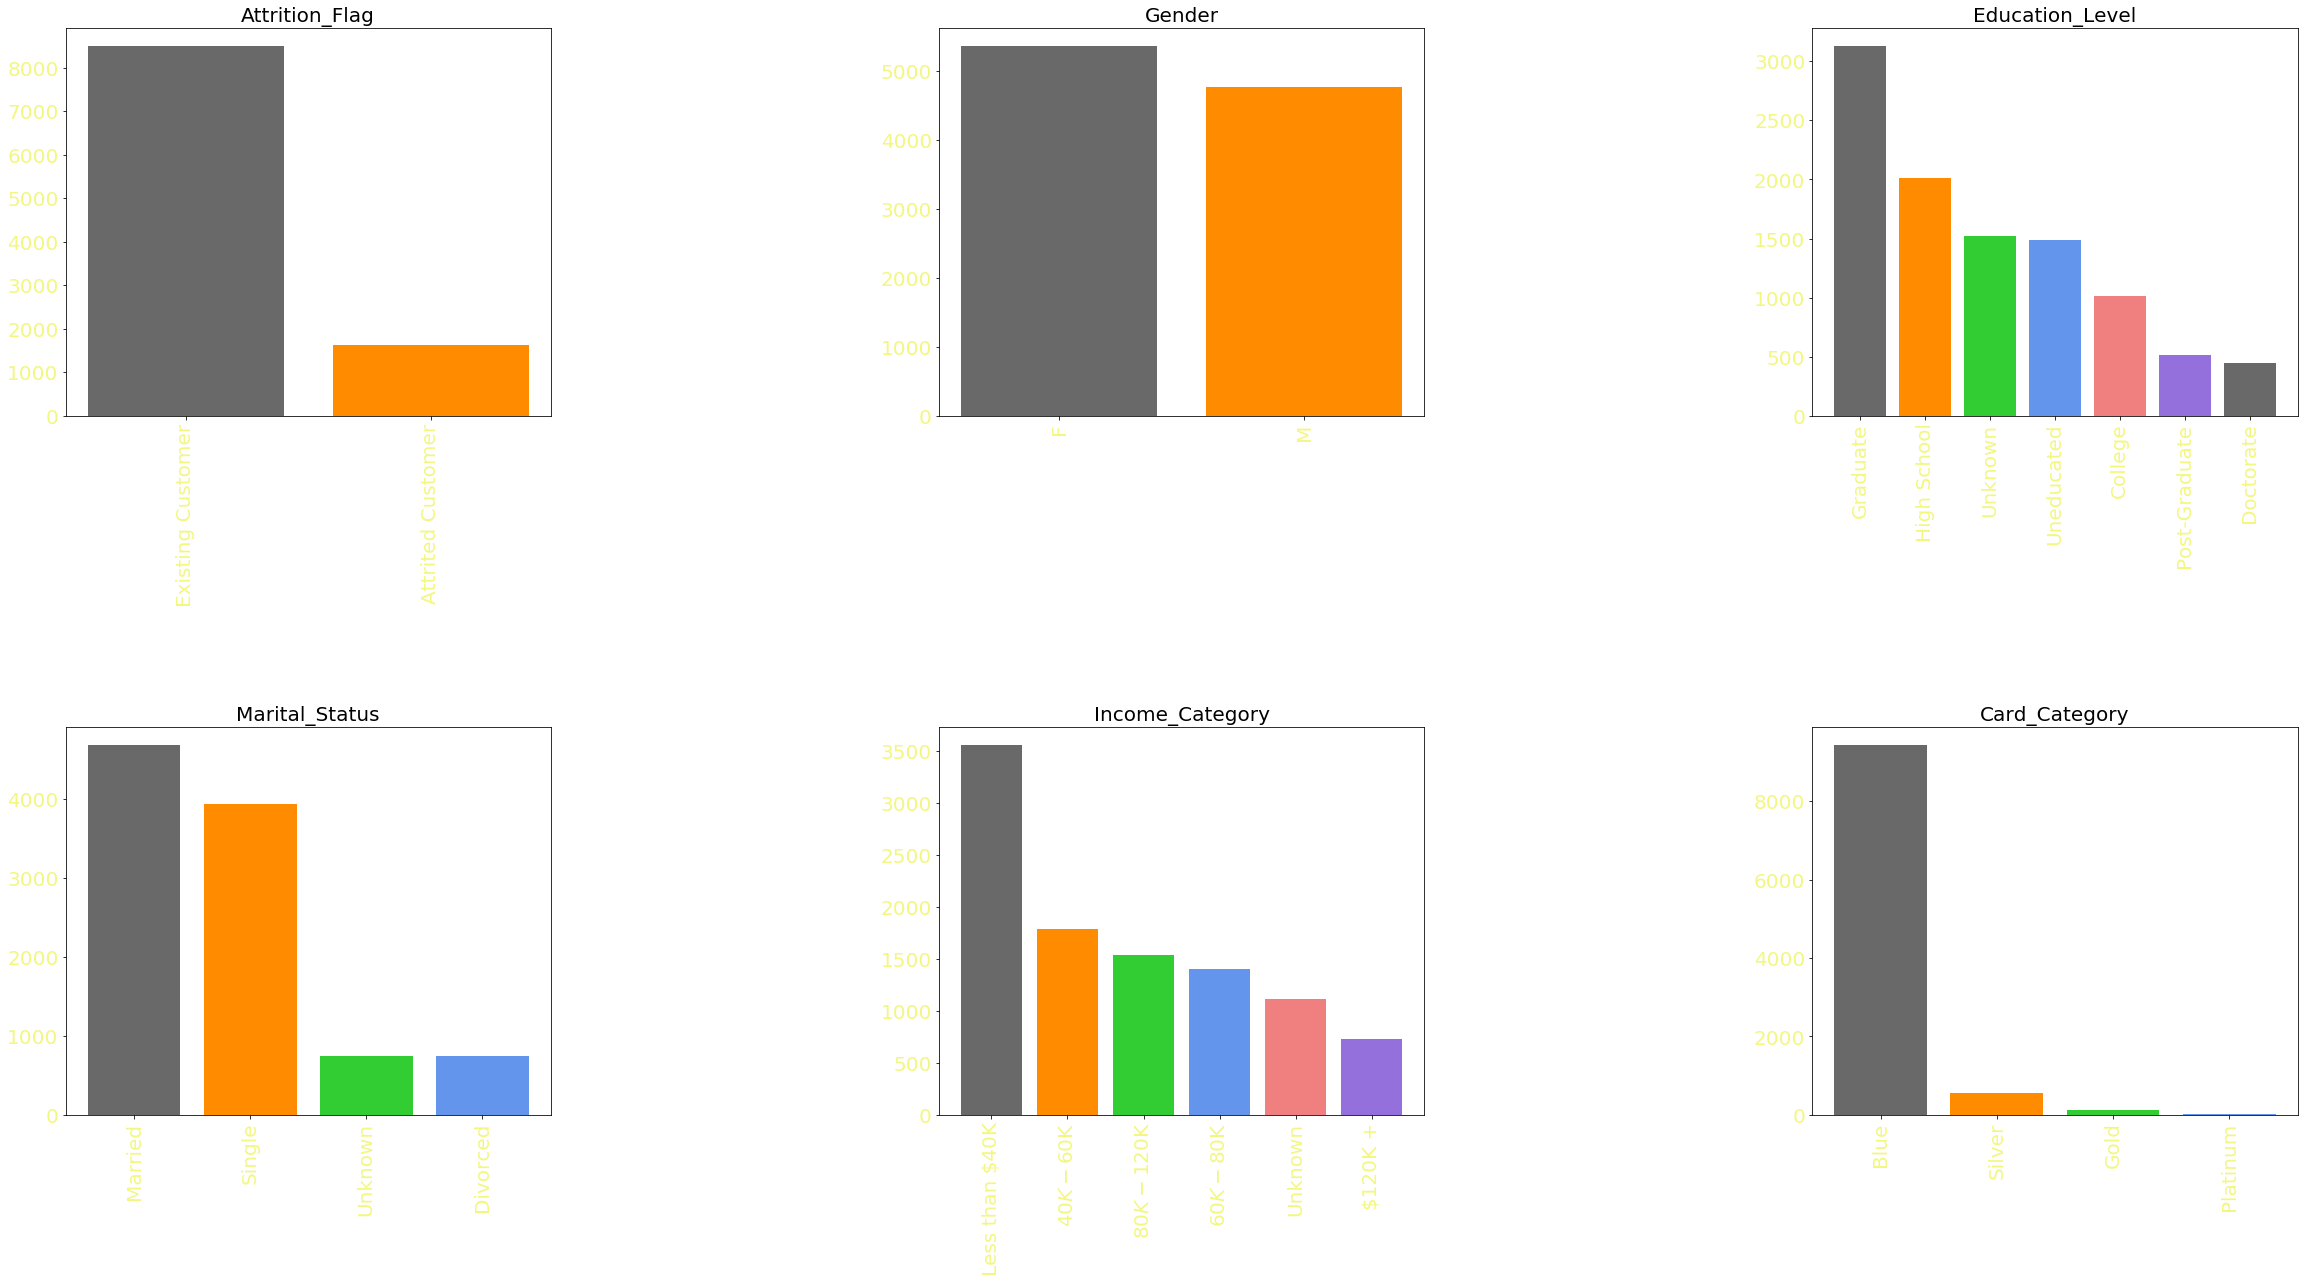

In [113]:
fig = plt.figure(figsize=(40, 20))
fig.subplots_adjust(hspace=0.8, wspace=0.8)

for i,var in enumerate(cat_col):
    tmp = data_df[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var], color=['dimgray','darkorange','limegreen','cornflowerblue','lightcoral','mediumpurple'])
    ax.set_title(var, fontsize = 20)
    ax.set_xticklabels(tmp['index'], rotation=90)
    plt.xticks(color='#F3F781', fontsize =20) 
    plt.yticks(color='#F3F781', fontsize =20) 

### <font color=yellow>Numerical Column</font>

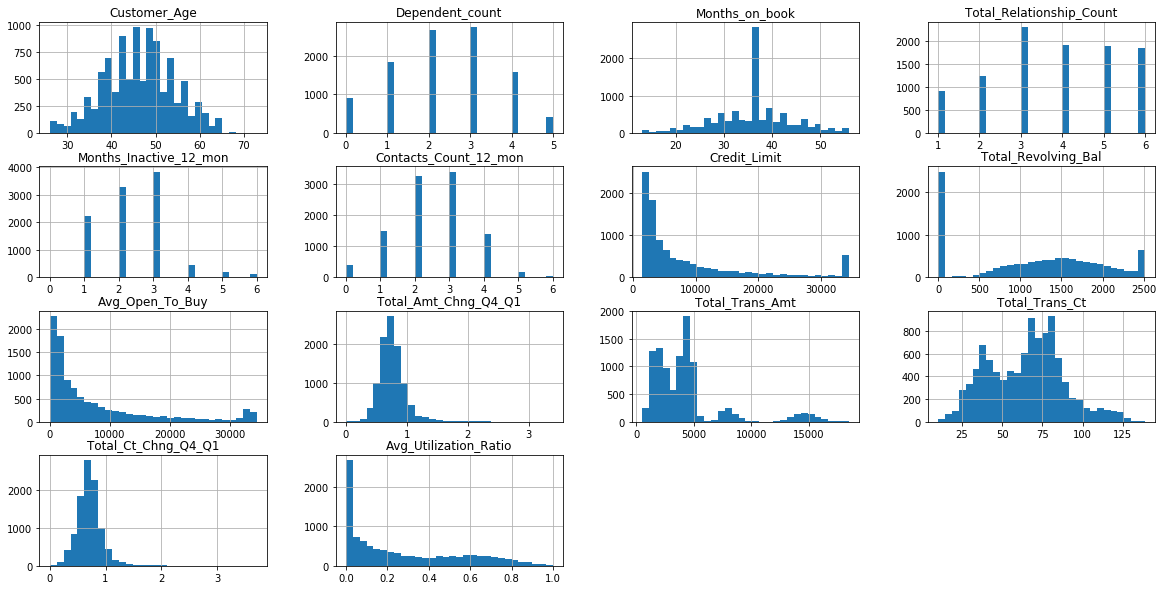

In [114]:
df_num = data_df[num_col]
df_num.hist(bins=30, figsize=(20,10) );

### <font color=yellow>Target Column</font>

Text(0.5, 1.0, 'Count values to target variable')

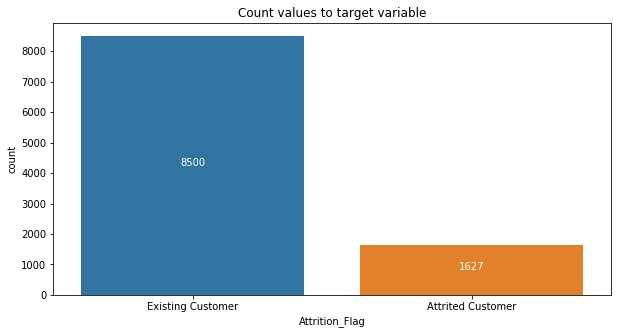

In [115]:
plt.figure(figsize=(10,5))
g= sns.countplot(x='Attrition_Flag', data=data_df);
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')
plt.title('Count values to target variable')

# <font color=#cccccc>결측치 확인 / Feature engineering & Feature selection</font>

### <font color=yellow>결측치 처리</font>

In [116]:
data_df[data_df.iloc[:,:] == 'Unknown'].count()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [117]:
print(data_df['Education_Level'].value_counts())
print()
print(data_df['Marital_Status'].value_counts())
print()
print(data_df['Income_Category'].value_counts())

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


In [118]:
df_Unknown = ['Unknown']
data_df.drop(data_df[data_df['Marital_Status'].isin(df_Unknown)].index, inplace = True)
data_df.drop(data_df[data_df['Education_Level'].isin(df_Unknown)].index, inplace = True)
data_df.drop(data_df[data_df['Income_Category'].isin(df_Unknown)].index, inplace = True)

### <font color=yellow>Categorical Column Labeling</font>

In [119]:
data_df.loc[data_df['Gender'] == 'M', 'Gender'] = 0
data_df.loc[data_df['Gender'] == 'F', 'Gender'] = 1
data_df['Gender'] = data_df['Gender'].astype(int)

In [122]:
data_df.loc[data_df['Education_Level'] == 'College', 'Education_Level'] = 14
data_df.loc[data_df['Education_Level'] == 'Doctorate', 'Education_Level'] = 21
data_df.loc[data_df['Education_Level'] == 'Graduate', 'Education_Level'] = 16
data_df.loc[data_df['Education_Level'] == 'High School', 'Education_Level'] = 12
data_df.loc[data_df['Education_Level'] == 'Post-Graduate', 'Education_Level'] = 18
data_df.loc[data_df['Education_Level'] == 'Uneducated', 'Education_Level'] = 8
data_df['Education_Level'] = data_df['Education_Level'].astype(int)

In [123]:
data_df.loc[data_df['Income_Category'] == 'Less than $40K', 'Income_Category'] = 30
data_df.loc[data_df['Income_Category'] == '$40K - $60K', 'Income_Category'] = 50
data_df.loc[data_df['Income_Category'] == '$60K - $80K', 'Income_Category'] = 70
data_df.loc[data_df['Income_Category'] == '$80K - $120K', 'Income_Category'] = 100
data_df.loc[data_df['Income_Category'] == '$120K +', 'Income_Category'] = 150
data_df.loc[data_df['Income_Category'] == 'Unknown', 'Income_Category'] = 0 # Will be fixed later
data_df['Income_Category'] = data_df['Income_Category'].astype(int)

In [124]:
data_df.loc[data_df['Card_Category'] == 'Blue', 'Card_Category'] = 1
data_df.loc[data_df['Card_Category'] == 'Silver', 'Card_Category'] = 2
data_df.loc[data_df['Card_Category'] == 'Gold', 'Card_Category'] = 3
data_df.loc[data_df['Card_Category'] == 'Platinum', 'Card_Category'] = 4
data_df['Card_Category'] = data_df['Card_Category'].astype(int)

In [125]:
data_df.loc[data_df['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'] = 0
data_df.loc[data_df['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'] = 1
data_df['Attrition_Flag'] = data_df['Attrition_Flag'].astype(int)

In [126]:
# 결측치를 제거하며, 빠진 인덱스값을 재정의

data_df = data_df.reset_index()
del data_df['index']
data_df.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7076,1,54,0,1,12,Single,70,1,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
7077,1,56,1,1,16,Single,30,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
7078,1,50,0,2,16,Single,50,1,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
7079,0,44,1,1,12,Married,30,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
7080,0,43,1,2,16,Married,30,2,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [128]:
data_df_oh =\
data_df[['Marital_Status']]

encoder = OneHotEncoder(sparse=False)
data_df_oh = pd.DataFrame(encoder.fit_transform(data_df_oh[['Marital_Status']]))
data_df_oh.columns = encoder.get_feature_names(['Marital_Status'])

data_df = pd.concat([data_df, data_df_oh],axis=1)
del data_df['Marital_Status']

data_df.head()

<font color=#cccccc>correlation matrix</font>
==

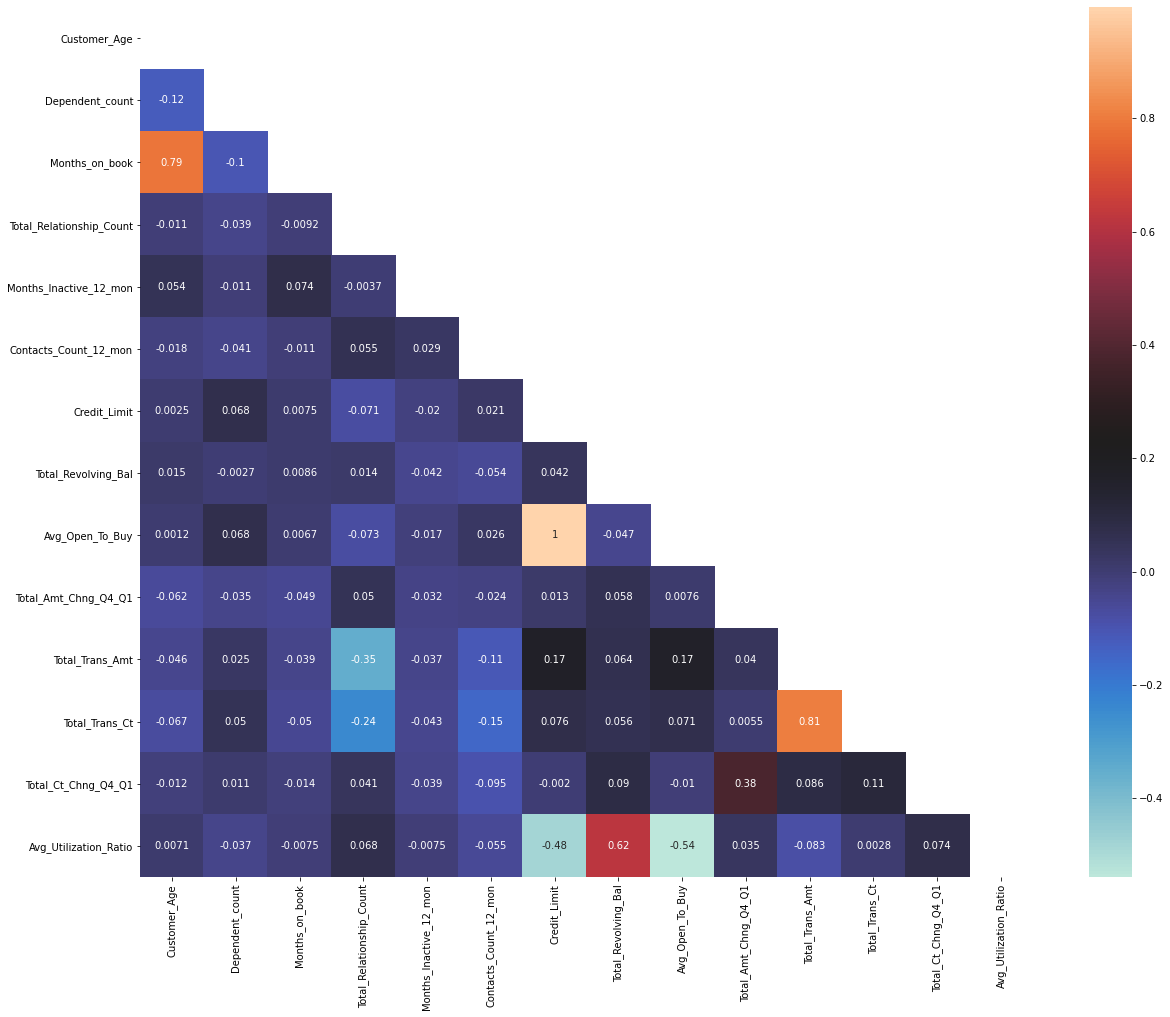

In [14]:
fig, ax = plt.subplots(figsize=(20, 16))
df_corr = data_df.corr(method="pearson")
mask = np.zeros_like(np.array(df_corr))
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask=mask, annot=True, cmap='icefire')

#결측치도 채워진 상태이며, 크게 상관계수가 튄다고 생각되는 열이 없음 열삭제 없이 그냥 진행

<font color=#cccccc>데이터 분리</font>
==

In [136]:
x_data = data_df.drop(['Attrition_Flag'], axis=1)
y_data = data_df['Attrition_Flag']

<font color=#cccccc>Train the model</font>
==

In [138]:
x_train, x_test, y_train, y_test =\
model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)

### <font color=yellow>Feature Scaling(Pipeline)</font>

In [139]:
numeric_features = ['Customer_Age', 'Months_on_book','Dependent_count', 'Total_Relationship_Count','Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1',
                    'Total_Trans_Ct','Total_Trans_Amt','Total_Amt_Chng_Q4_Q1','Avg_Open_To_Buy','Total_Revolving_Bal','Months_Inactive_12_mon',
                   'Contacts_Count_12_mon','Credit_Limit']
numeric_transformer = StandardScaler()

categorical_features = ['Education_Level', 'Income_Category', 'Card_Category', 'Marital_Status_Single','Marital_Status_Married','Marital_Status_Divorced']
categorical_transformer = OneHotEncoder(categories='auto') # categories='auto' : just for ignoring warning messages

preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)])

preprocessor_pipe.fit(x_train)

x_train_transformed = preprocessor_pipe.transform(x_train)
x_test_transformed = preprocessor_pipe.transform(x_test)

pd.DataFrame(x_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.031516,0.382646,0.503334,-0.528565,1.867430,-0.248166,0.065913,-0.226807,-0.072588,-0.748406,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.465118,0.506545,-1.042699,1.413773,-0.136514,-0.227189,-0.686286,-0.602199,-0.529711,-0.465262,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.528149,-0.732443,0.503334,0.766327,-1.004532,-0.877476,-0.937019,-0.445185,-0.309941,-0.645385,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,-0.900624,-0.236848,-0.269682,1.413773,-0.843788,-0.206212,0.776322,0.097591,-0.274777,0.661164,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.085910,1.249938,-1.042699,1.413773,-1.004532,-0.420177,-1.145963,-0.598166,0.498816,-0.340494,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,-0.900624,-0.856342,-1.042699,1.413773,-0.697332,-0.105522,-1.354907,-0.539970,-0.024239,1.505764,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4952,-0.155674,-1.351937,-0.269682,-0.528565,-0.450858,0.053903,-1.396696,-0.787158,-1.290118,-0.256693,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4953,-1.645575,0.010950,-1.042699,0.118881,0.642202,-1.066269,-0.686286,-0.683154,-0.081379,-0.630997,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4954,0.713435,1.373837,0.503334,1.413773,-1.004532,-1.666211,-0.937019,-0.766991,-1.527470,1.285004,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


### <font color=yellow>ML model import</font>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier

XGBoostLibraryNotFound: Cannot find XGBoost Library in the candidate path.  List of candidates:
- C:\ProgramData\Anaconda3\lib\site-packages\xgboost\lib\xgboost.dll
- C:\ProgramData\Anaconda3\lib\site-packages\xgboost\..\..\lib\xgboost.dll
- C:\ProgramData\Anaconda3\lib\xgboost.dll
- C:\ProgramData\Anaconda3\lib\site-packages\xgboost\../../windows/x64/Release/xgboost.dll
- C:\ProgramData\Anaconda3\lib\site-packages\xgboost\./windows/x64/Release/xgboost.dll
XGBoost Python package path: C:\ProgramData\Anaconda3\lib\site-packages\xgboost
sys.prefix: C:\ProgramData\Anaconda3
See: https://xgboost.readthedocs.io/en/latest/build.html for installing XGBoost.

### <font color=yellow>LogisticRegression</font>

In [149]:
clf_LR = LogisticRegression(random_state=0)
clf_LR.fit(x_train, y_train)
clf_LR_pred=clf_LR.predict(x_test)

print('accuracy: %.4f' % accuracy_score(y_test, clf_LR_pred))
print('precision: %.4f' % precision_score(y_test, clf_LR_pred))
print('recall: %.4f' % recall_score(y_test, clf_LR_pred))
print('F1: %.4f' % f1_score(y_test, clf_LR_pred))

accuracy: 0.8682
precision: 0.8955
recall: 0.9576
F1: 0.9255


### <font color=yellow>XGBClassifier</font>

In [145]:
clf_XGB = XGBClassifier(random_state=0)
clf_XGB.fit(x_train, y_train)
acc = accuracy_score(y_test, clf_XGB.predict(x_test))
print("The accuracy score on test set: {:.4f}".format(acc))
print('precision: %.4f' % precision_score(y_test, clf_XGB.predict(x_test)))
print('recall: %.4f' % recall_score(y_test, clf_XGB.predict(x_test)))
print('F1: %.4f' % f1_score(y_test, clf_XGB.predict(x_test)))

The accuracy score on test set: 0.9704
precision: 0.9741
recall: 0.9917
F1: 0.9828


### <font color=yellow>LGBMClassifier</font>

In [146]:
clf_LGBM = LGBMClassifier(random_state=0)
clf_LGBM.fit(x_train, y_train)
acc = accuracy_score(y_test, clf_LGBM.predict(x_test))
print("The accuracy score on test set: {:.4f}".format(acc))
print('precision: %.4f' % precision_score(y_test, clf_LGBM.predict(x_test)))
print('recall: %.4f' % recall_score(y_test, clf_LGBM.predict(x_test)))
print('F1: %.4f' % f1_score(y_test, clf_LGBM.predict(x_test)))

The accuracy score on test set: 0.9736
precision: 0.9825
recall: 0.9868
F1: 0.9846


### <font color=yellow>confusion_matrix</font>

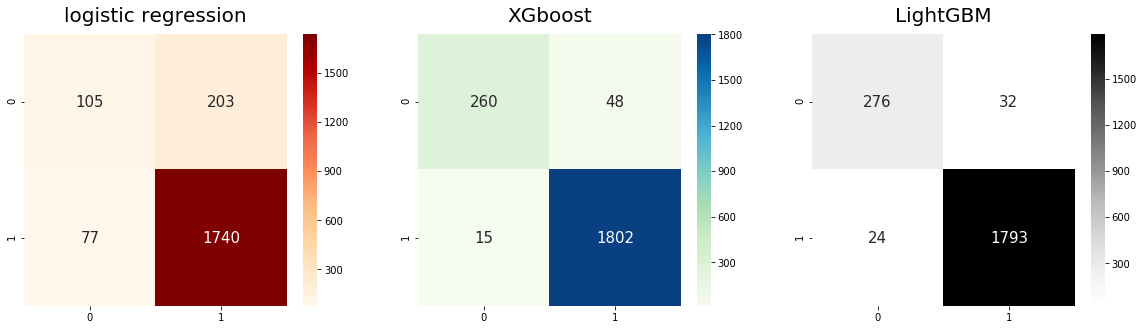

In [150]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 5))

confu = confusion_matrix(y_true = y_test, y_pred = clf_LR_pred)
confu2 = confusion_matrix(y_true = y_test, y_pred = clf_XGB.predict(x_test))
confu3 = confusion_matrix(y_true = y_test, y_pred = clf_LGBM.predict(x_test))


sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g', ax=ax[0])
sns.heatmap(confu2, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g', ax=ax[1])
sns.heatmap(confu3, annot=True, annot_kws={'size':15}, cmap='Greys', fmt='.10g', ax=ax[2])
ax[0].set_title('logistic regression',pad = 12, fontsize = 20)
ax[1].set_title('XGboost',pad = 12, fontsize = 20)
ax[2].set_title('LightGBM',pad = 12, fontsize = 20)
plt.show()

### <font color=yellow>get important features</font>

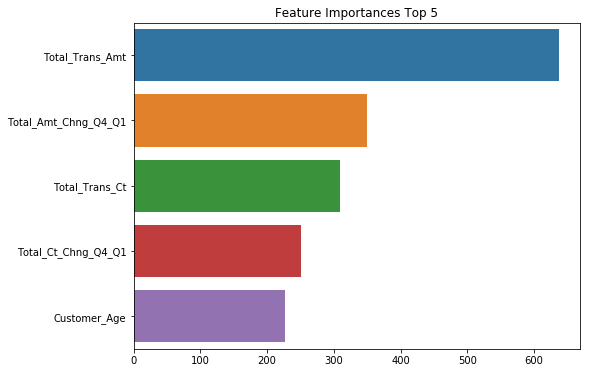

In [155]:
feature_importance_values = clf_LGBM.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=x_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()